In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# Data reading and validation

In [2]:
df = pd.read_csv("bulldozers-data/TrainAndValid.csv", low_memory=False)

In [3]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,11/16/2006 0:00,3/26/2004 0:00,2/26/2004 0:00,5/19/2011 0:00,7/23/2009 0:00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [6]:
df.saledate[:5]

0    11/16/2006 0:00
1     3/26/2004 0:00
2     2/26/2004 0:00
3     5/19/2011 0:00
4     7/23/2009 0:00
Name: saledate, dtype: object

In [7]:
# import data again, while also parsing dates
df = pd.read_csv("bulldozers-data/TrainAndValid.csv", 
                 low_memory=False,
                 parse_dates=["saledate"])

In [8]:
df.saledate[:5]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

In [9]:
# sort data by date
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate[:5]

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
Name: saledate, dtype: datetime64[ns]

In [10]:
# make a copy of the data, just in case
df_orig = df.copy()

#### Populate the data with separate `saledate` columns

In [11]:
df["sale_year"] = df.saledate.dt.year
df["sale_month"] = df.saledate.dt.month
df["sale_day"] = df.saledate.dt.day
df["sale_dayofweek"] = df.saledate.dt.day_of_week
df["sale_dayofyear"] = df.saledate.dt.day_of_year
df.drop("saledate", axis=1, inplace=True)

In [12]:
df.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


## We have missing data and non-numerical data

1. Fix non-numerical data

In [13]:
# change strings into categories
for col, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[col] = content.astype("category").cat.as_ordered()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

2. Fix missing data

In [15]:
# fill missing numerical with median
for col, content in df.items():
    if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
        # save column, just in case
        df[col+"_missing"] = pd.isnull(content)
        # fill values
        df[col] = content.fillna(content.median())

In [16]:
# turn categorical to numerical and fill missing 
for col, content in df.items():
    if pd.api.types.is_categorical_dtype(content):
        # save column, just in case
        df[col+"_missing"] = pd.isnull(content)
        # turn to numerical and add 1 (to have only positive values)
        df[col] = pd.Categorical(content).codes + 1

In [17]:
df.isna().sum()

SalesID                      0
SalePrice                    0
MachineID                    0
ModelID                      0
datasource                   0
                            ..
Backhoe_Mounting_missing     0
Blade_Type_missing           0
Travel_Controls_missing      0
Differential_Type_missing    0
Steering_Controls_missing    0
Length: 103, dtype: int64

In [18]:
# wrap everything in a function
def read_and_process(filepath):
    """
    Reads the csv file found at filepath and makes the necessary changes
    Changes made: - parse dates
                  - expand date column with several separate columns
                  - convert non-numerical to numerical
                  - fill missing data
    """
    df = pd.read_csv(filepath, 
                 low_memory=False,
                 parse_dates=["saledate"])
    df["sale_year"] = df.saledate.dt.year
    df["sale_month"] = df.saledate.dt.month
    df["sale_day"] = df.saledate.dt.day
    df["sale_dayofweek"] = df.saledate.dt.day_of_week
    df["sale_dayofyear"] = df.saledate.dt.day_of_year
    df.drop("saledate", axis=1, inplace=True)
    for col, content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[col] = content.astype("category").cat.as_ordered()
    for col, content in df.items():
        if pd.api.types.is_numeric_dtype(content) and pd.isnull(content).sum():
            df[col+"_missing"] = pd.isnull(content)
            df[col] = content.fillna(content.median())
        if pd.api.types.is_categorical_dtype(content):
            df[col+"_missing"] = pd.isnull(content)
            df[col] = pd.Categorical(content).codes + 1
    return df

# Model fitting

## We are predicting a quantity => Regression

## Model used:
* Random Forest Regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

In [20]:
# data splitting into training and validation sets
df_val = df[df.sale_year == 2012]
df_train = df[df.sale_year != 2012]
X_val = df_val.drop("SalePrice", axis=1)
y_val = df_val.SalePrice
X_train = df_train.drop("SalePrice", axis=1)
y_train = df_train.SalePrice

In [21]:
# evaluation function, using RMSLE
def rmsle(y_test, y_pred):
    """
    Calculates root mean squared log error (RMSLE) between predictions and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_pred))

In [22]:
%%time
# fitting
model = RandomForestRegressor(n_jobs=-1,
                              random_state=99,
                              max_samples=10000) # only 10k to improve speed
model.fit(X_train, y_train)

Wall time: 9.4 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=99)

In [23]:
# predictions function, printing MAE, RMSLE and R^2 for train and validation sets
def show_scores(model):
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    scores = {"Training MAE": mean_absolute_error(y_train, train_pred),
              "Valid MAE": mean_absolute_error(y_val, val_pred),
              "Training RMSLE": rmsle(y_train, train_pred),
              "Valid RMSLE": rmsle(y_val, val_pred),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_val, y_val)}
    return scores
show_scores(model)

{'Training MAE': 5557.122679837955,
 'Valid MAE': 7115.270619545493,
 'Training RMSLE': 0.2578017500749804,
 'Valid RMSLE': 0.29093130655166566,
 'Training R^2': 0.8607466147066621,
 'Valid R^2': 0.8338188777044149}

# Model tuning

### Hyperparam tuning with `RandomSearchCV`

In [24]:
%%time
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": np.arange(10, 100, 10),
        "max_depth": [None, 3, 5, 10],
        "min_samples_split": np.arange(2, 20, 2),
        "min_samples_leaf": np.arange(1, 20, 2),
        "max_features": [0.5, 1, "sqrt", "auto"],
        "max_samples": [10000]}
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=99),
                        param_distributions=grid,
                        n_iter=30,
                        cv=5,
                        verbose=True)
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Wall time: 9min 46s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=99),
                   n_iter=30,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [25]:
show_scores(rs_model)

{'Training MAE': 6575.47695336405,
 'Valid MAE': 7866.521833553777,
 'Training RMSLE': 0.29494573672806973,
 'Valid RMSLE': 0.31480152083336627,
 'Training R^2': 0.8122963102271968,
 'Valid R^2': 0.7949243780550541}

In [26]:
rs_model.best_params_

{'n_estimators': 20,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': 10}

In [27]:
%%time
# recreate the model with the best params
model = RandomForestRegressor(n_estimators=40,
                              min_samples_leaf=1,
                              min_samples_split=14,
                              max_features=0.5,
                              n_jobs=-1,
                              max_samples=None,
                              random_state=99) # params totally not taken from the internet, trust me
model.fit(X_train, y_train)

Wall time: 54.6 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=99)

In [28]:
show_scores(model)

{'Training MAE': 2955.902438148916,
 'Valid MAE': 5971.53778253595,
 'Training RMSLE': 0.14465887124815266,
 'Valid RMSLE': 0.24603027600570354,
 'Training R^2': 0.958800789047542,
 'Valid R^2': 0.8811761306762583}

## Importing and preprocessing test data

In [29]:
df_test = read_and_process("bulldozers-data/Test.csv")

In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Columns: 101 entries, SalesID to Steering_Controls_missing
dtypes: bool(45), float64(1), int16(2), int64(11), int8(42)
memory usage: 2.2 MB


In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401125 entries, 205615 to 393123
Columns: 102 entries, SalesID to Steering_Controls_missing
dtypes: bool(46), float64(2), int16(4), int64(10), int8(40)
memory usage: 75.7 MB


In [32]:
for col in X_train.keys():
    if col not in df_test.keys():
        print(col)

auctioneerID_missing


#### auctioneerID_missing is missing => auctioneerID has no missing values
#### We add the column still, every row containing the value 'False'

In [33]:
# get column location train set
X_train.columns.get_loc("auctioneerID_missing")

56

In [34]:
# insert at that location in test set
df_test.insert(56, "auctioneerID_missing", False)
for col in X_train.keys():
    if col not in df_test.keys():
        print(col)

### Test predictions

In [35]:
test_pred = model.predict(df_test)

In [36]:
test_pred # y_true values were not supplied so yeah...can only pray further on

array([16773.85690925, 16189.43813763, 47070.67273091, ...,
       14303.03023464, 15612.79879206, 26192.4617986 ])

# Feature importance

Text(0.5, 0, 'Feature importances')

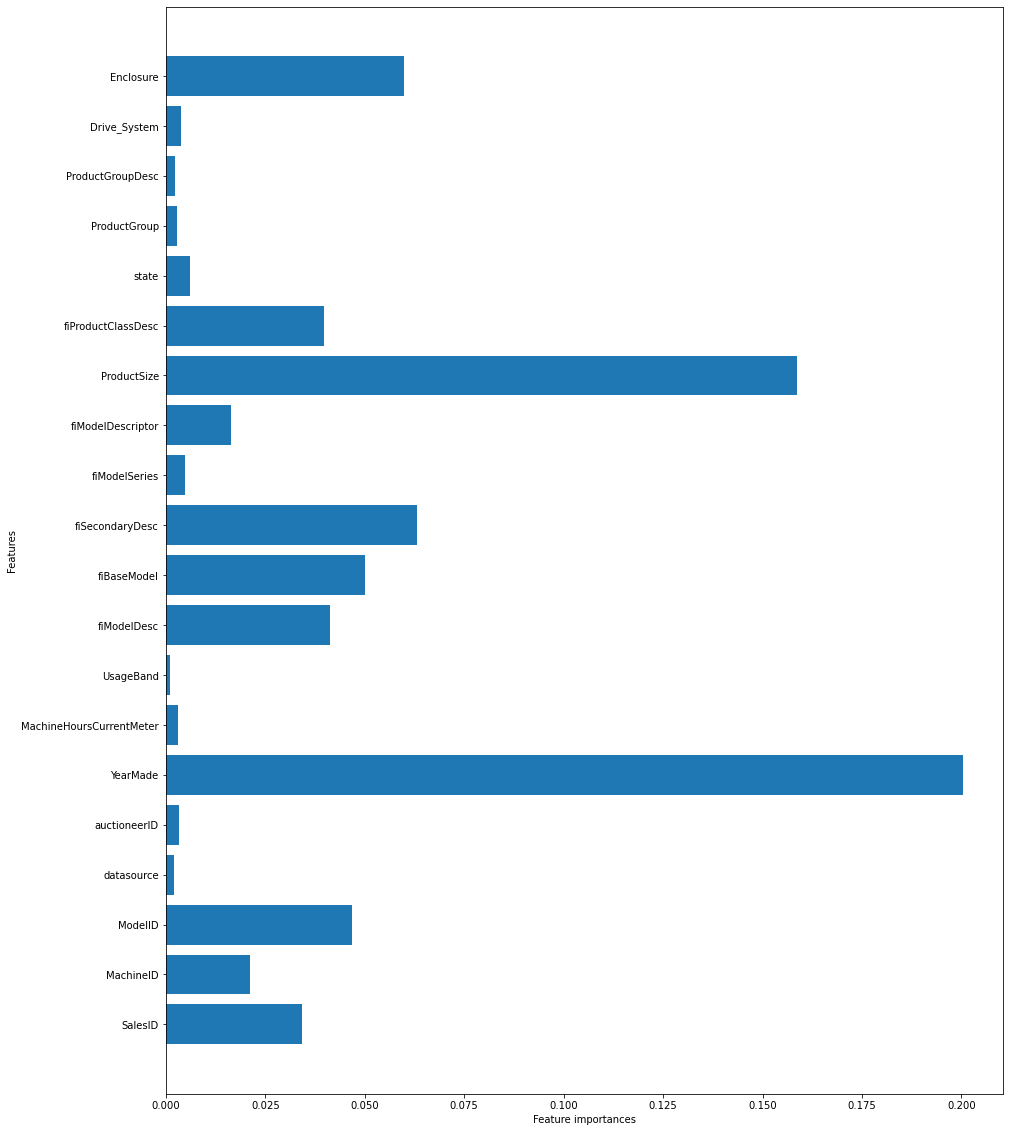

In [37]:
df = (pd.DataFrame({"features": X_train.columns,
                        "feature_importances": model.feature_importances_})
          .reset_index(drop=True))
fig, ax = plt.subplots(figsize=(15, 20))
ax.barh(df["features"][:20], df["feature_importances"][:20])
ax.set_ylabel("Features")
ax.set_xlabel("Feature importances")

## Exporting the model

In [40]:
from joblib import dump
dump(model, "exported-models/bulldozers-rfr-model.joblib")

['exported-models/bulldozers-rfr-model.joblib']